<a href="https://colab.research.google.com/github/reitezuz/18NES2-2025/blob/main/week_08/simple_encoder_decoder_archiectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simple Encoder-Decoder CNN Architectures

-This notebook demonstrates three minimal encoder–decoder architectures commonly used in computer vision:
  - Strided-convolution encoder–decoder,
  - Pooling–unpooling encoder–decoder,
  - Skip-connected (U-Net style) encoder–decoder.
- Each variant highlights a different way of compressing and reconstructing spatial information.
- Each example is intentionally compact and easy to read, enabling readers to understand the structural principles behind modern encoder–decoder models

## Encoder–Decoder Model with Strided Convolutions
- a basic encoder-decoder architecture that uses strided convolutions for downsampling and Conv2DTranspose for upsampling
- the model can be used for image segmentation
- a similar model (with a different output layer) can be used as an autoencoder, e.g. to reconstruct images

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_3 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 100, 100, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 100, 100, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 50, 50, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_24 (Conv2D)              │ (None, 50, 50, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 25, 25, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 25, 25, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_12             │ (None, 25, 25, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_13             │ (None, 50, 50, 256)    │       590,080 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_14             │ (None, 50, 50, 128)    │       295,040 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_15             │ (None, 100, 100, 128)  │       147,584 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_16             │ (None, 100, 100, 64)   │        73,792 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_17             │ (None, 200, 200, 64)   │        36,928 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 200, 200, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,880,643 (10.99 MB)

 Trainable params: 2,880,643 (10.99 MB)

 Non-trainable params: 0 (0.00 B)

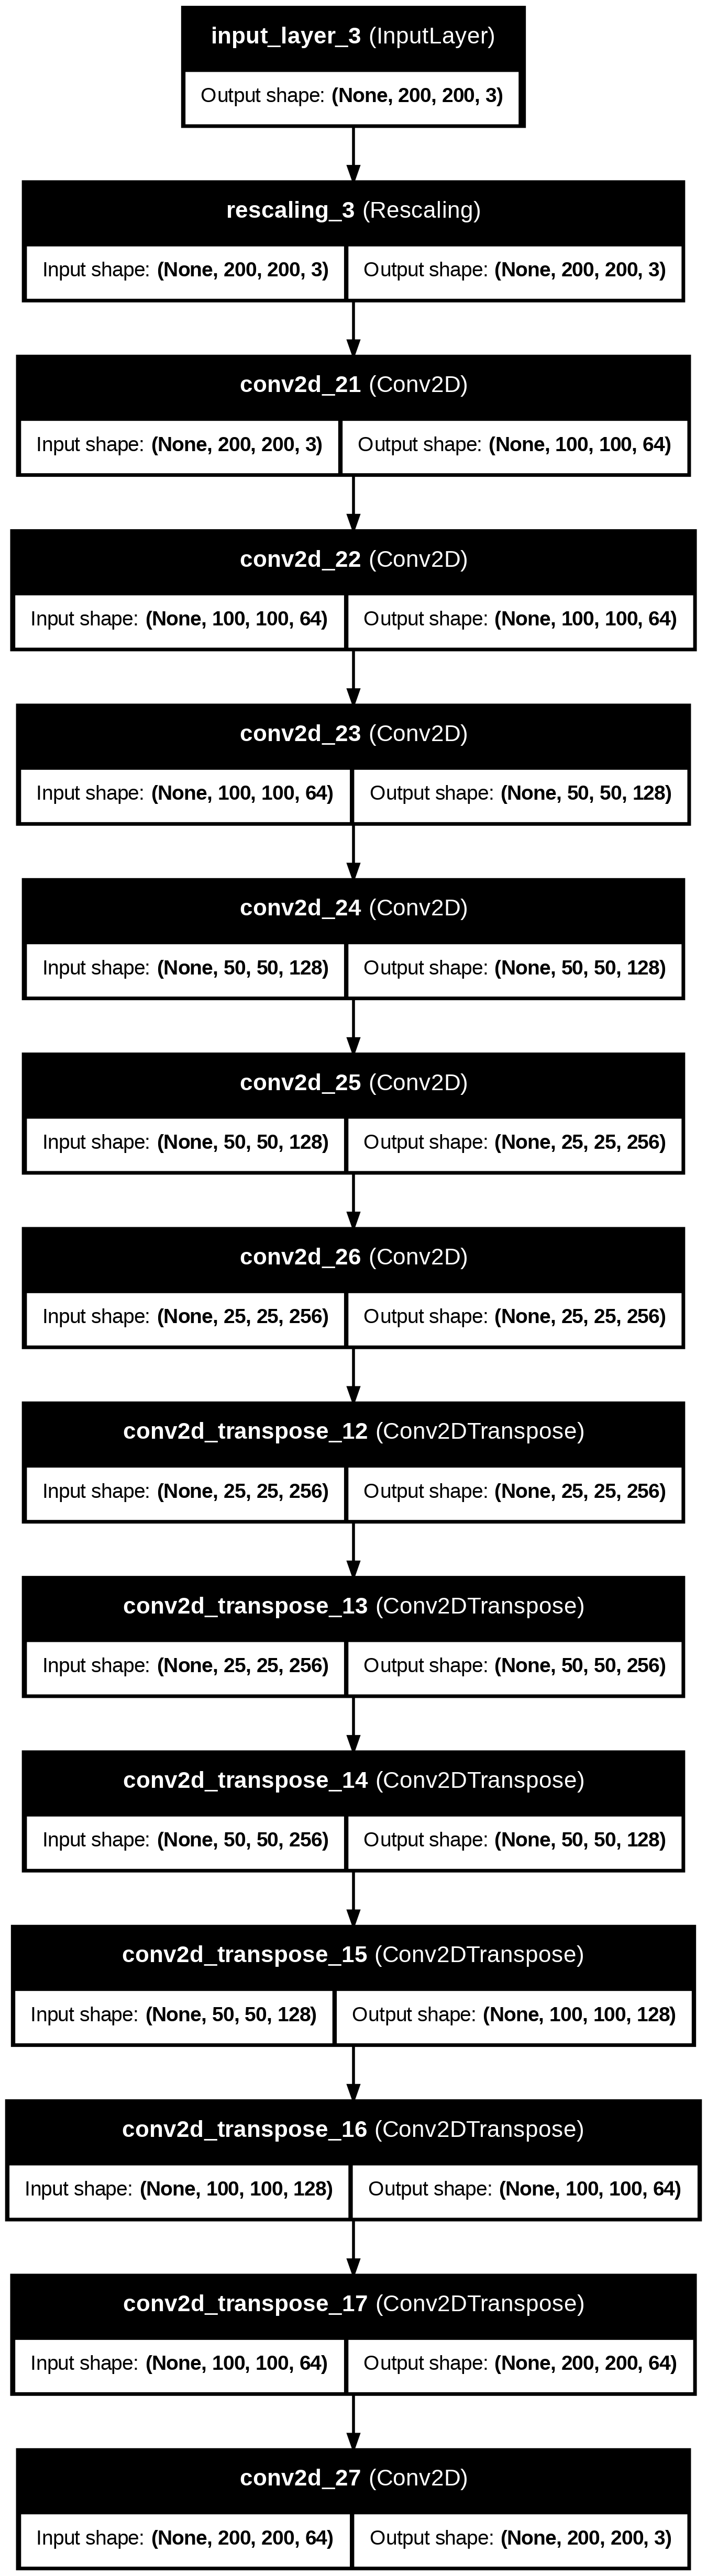

In [ ]:
import keras
from keras import layers
# Define the model architecture

def get_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))
    x = layers.Rescaling(1./255)(inputs)

    # Encoder: downsampling using strided convolutions ... by adding strides to every other convolution layer
    # we strictly use 'same' padding
    x = layers.Conv2D(64, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x) # strides=(1, 1),
    x = layers.Conv2D(128, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, strides=2, activation="relu", padding="same")(x)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)

    # Latent space
    latent = x

    # decoder: upsampling using transposed convolutions (deconvolutions)
    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same")(latent)
    x = layers.Conv2DTranspose(256, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(128, 3, activation="relu", padding="same", strides=2)(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same")(x)
    x = layers.Conv2DTranspose(64, 3, activation="relu", padding="same", strides=2)(x)

    # Output for segmentation classification into n classes:
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # Output for reconstruction / denoising:
    # outputs = layers.Conv2D(3, 3, padding="same", activation="sigmoid")(x)

    model = keras.Model(inputs, outputs)
    return model

model = get_model(img_size=(200, 200), num_classes=3)
model.summary()

keras.utils.plot_model(model, to_file="segmentation_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="segmentation_model.png", width=300))

## Encoder–Decoder with Pooling and Unpooling
- Here we explore a model that uses max-pooling layers in the encoder and corresponding unpooling (i.e. upsampling) layers in the decoder.
- This structure is common in image restoration and visualization tasks.

Model: "pool_unpool_segmentation"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_4 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_3 (UpSampling2D)  │ (None, 50, 50, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_4 (UpSampling2D)  │ (None, 100, 100, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 100, 100, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_5 (UpSampling2D)  │ (None, 200, 200, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 200, 200, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 200, 200, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,331,459 (5.08 MB)

 Trainable params: 1,331,459 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

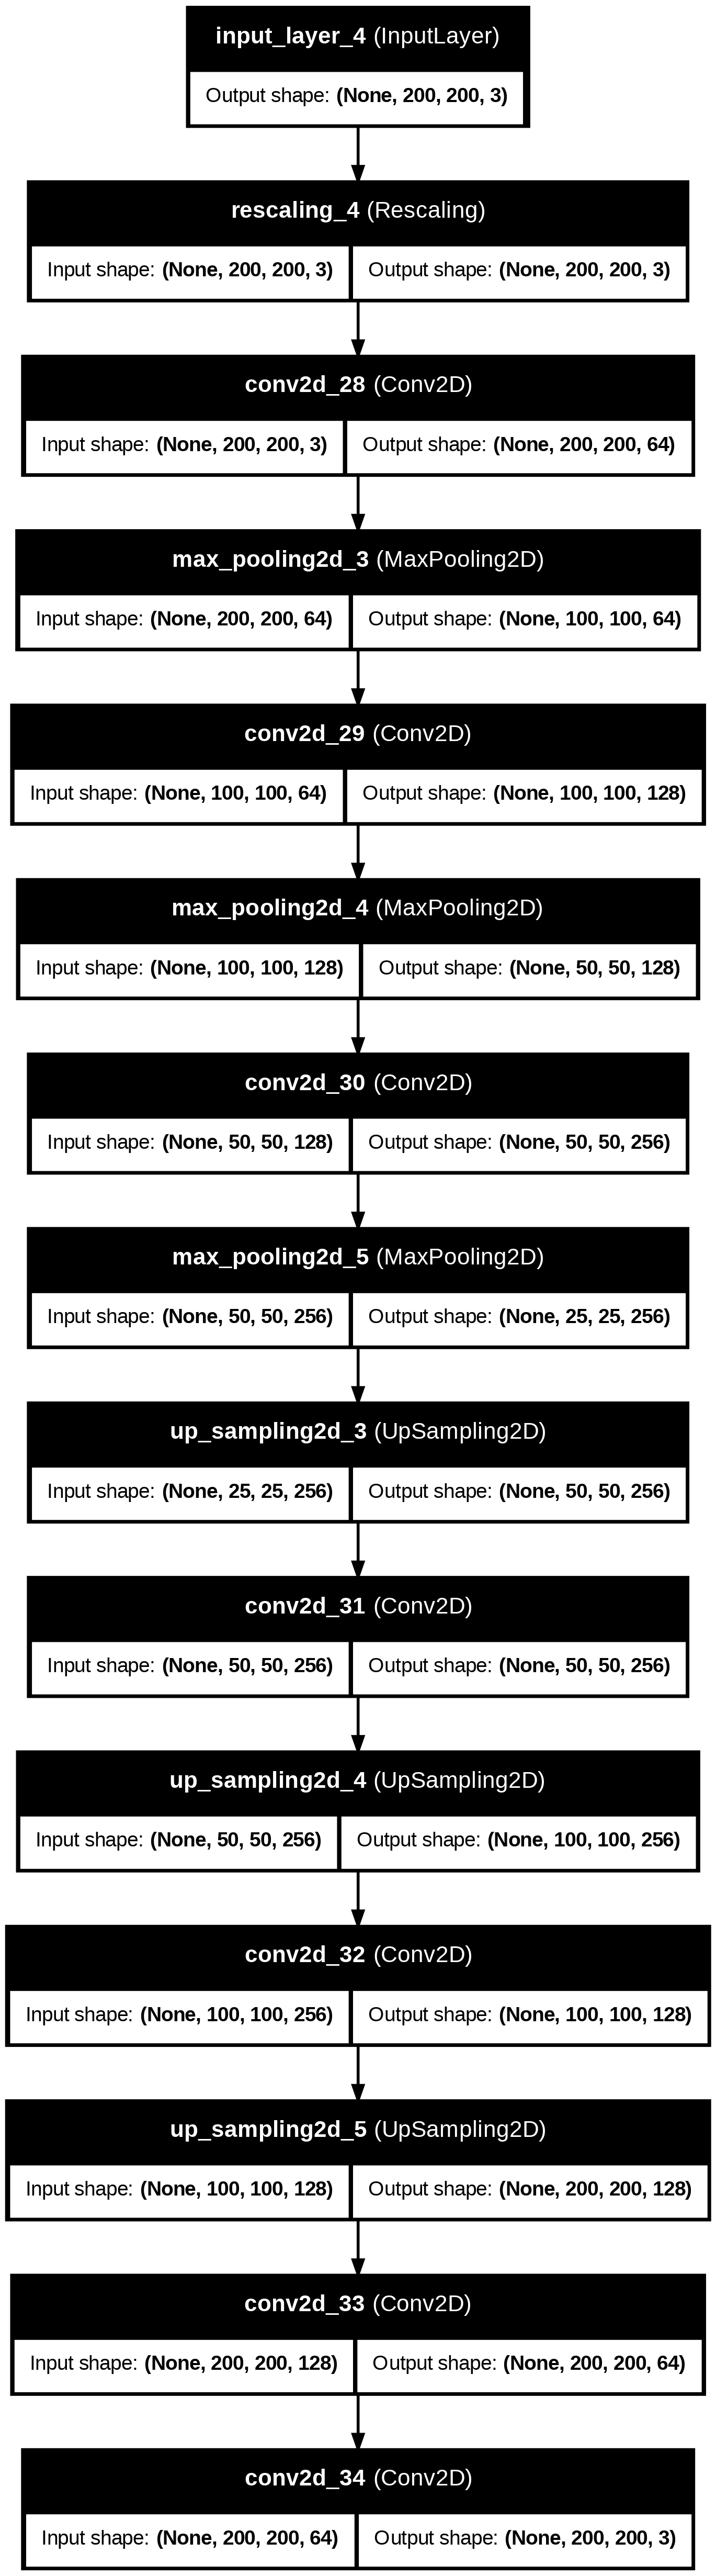

In [ ]:
import keras
from keras import layers
# Define the model architecture
def get_segmentation_pool_unpool_model(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))
    x = layers.Rescaling(1./255)(inputs)

    # Encoder: Conv + MaxPooling
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)

    # Latent space
    latent = x

    # Decoder: UpSampling ("unpooling") + Conv
    x = layers.UpSampling2D(size=2)(latent)
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)

    x = layers.UpSampling2D(size=2)(x)
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)

    x = layers.UpSampling2D(size=2)(x)
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)

    # For segmentation: Per-pixel classification into num_classes
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(x)

    # For reconstruction / denoising:
    # outputs = layers.Conv2D(3, 3, padding="same", activation="sigmoid")(x)

    model = keras.Model(inputs, outputs, name="pool_unpool_segmentation")
    return model


model = get_segmentation_pool_unpool_model(img_size=(200, 200), num_classes=3)
model.summary()

keras.utils.plot_model(model, to_file="segmentation_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="segmentation_model.png", width=300))

## Autoencoder with Pooling and Unppooling
- Similar architecture for different purpose: e.g., visualizations, image restauration or denoising

Model: "pool_unpool_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 200, 200, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 100, 100, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 100, 100, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 50, 50, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 50, 50, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 25, 25, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_6 (UpSampling2D)  │ (None, 50, 50, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 50, 50, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_7 (UpSampling2D)  │ (None, 100, 100, 256)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 100, 100, 128)  │       295,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ up_sampling2d_8 (UpSampling2D)  │ (None, 200, 200, 128)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 200, 200, 64)   │        73,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 200, 200, 3)    │         1,731 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,331,459 (5.08 MB)

 Trainable params: 1,331,459 (5.08 MB)

 Non-trainable params: 0 (0.00 B)

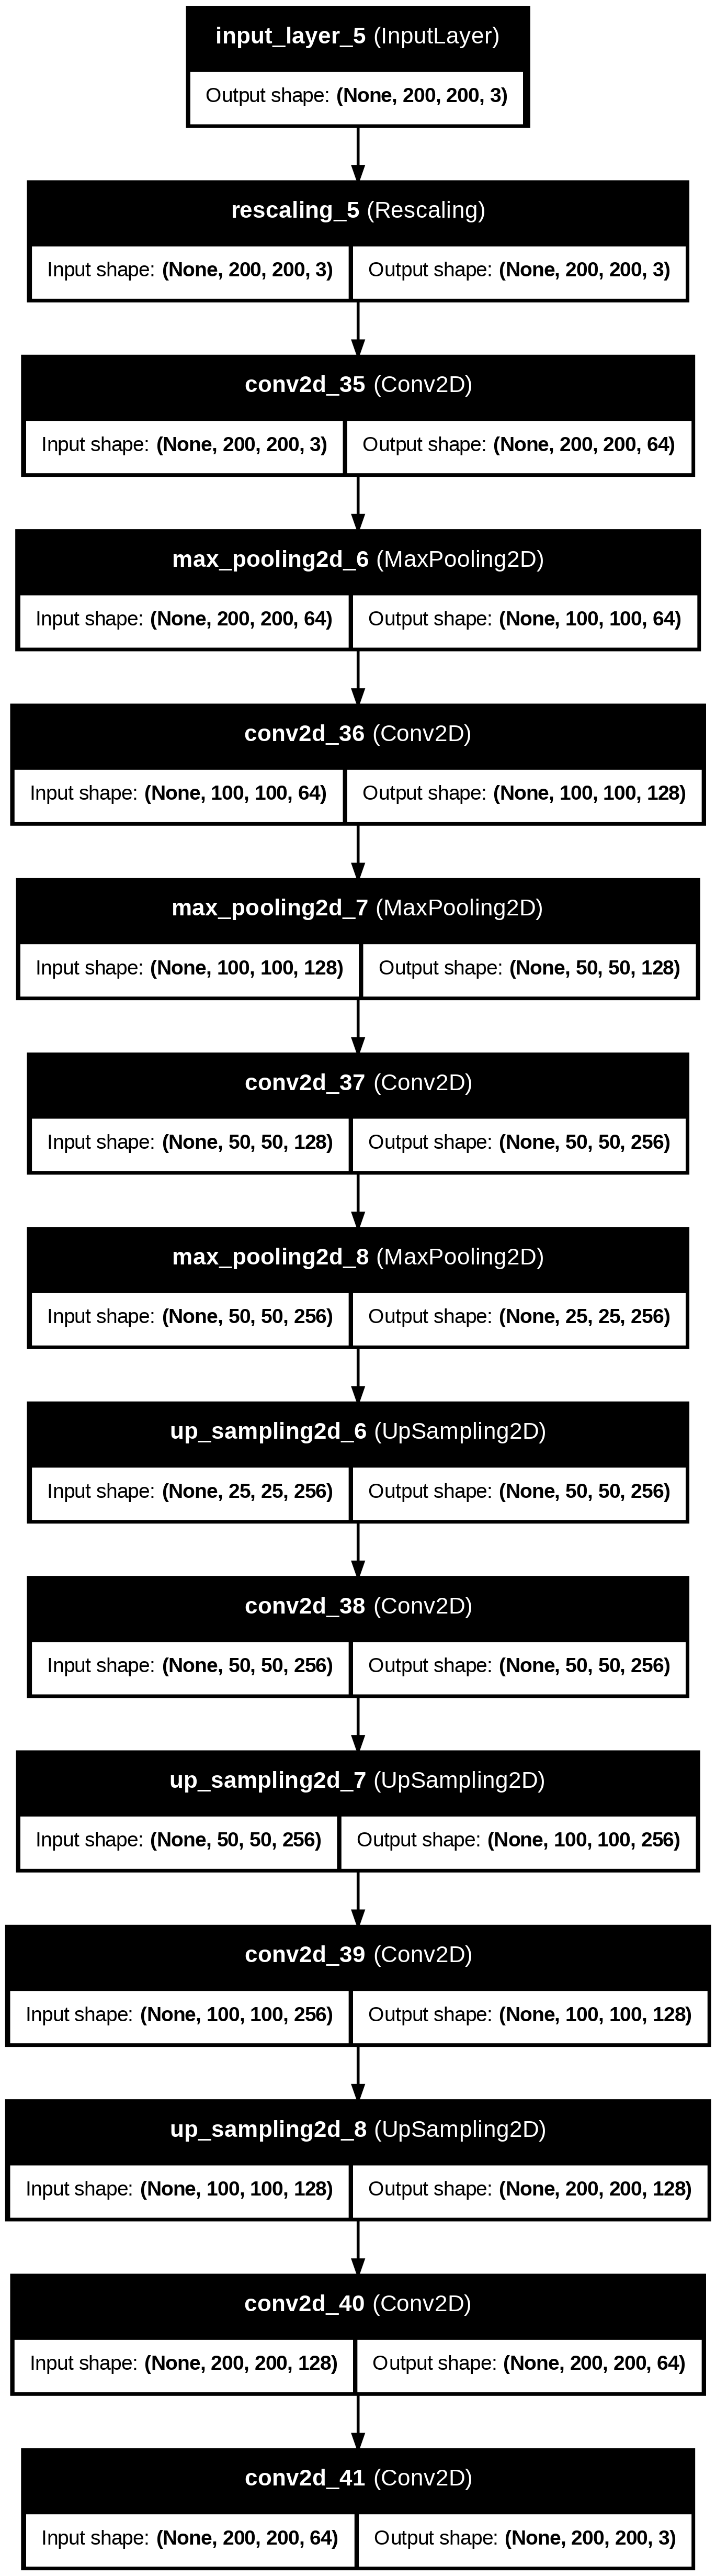

In [ ]:
import keras
from keras import layers
# Define the model architecture

def get_autoencoder_pool_unpool(img_size):
    inputs = keras.Input(shape=img_size + (3,))
    x = layers.Rescaling(1./255)(inputs)

    # ----- Encoder: Conv + MaxPooling -----
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)   # 1/2 resolution

    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)
    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)   # 1/4 resolution

    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)
    x = layers.MaxPooling2D(pool_size=2, padding="same")(x)   # 1/8 resolution

    # Latent space
    latent = x

    # ----- Decoder: UpSampling ("unpooling") + Conv -----
    x = layers.UpSampling2D(size=2)(latent)                   # 1/4 resolution
    x = layers.Conv2D(256, 3, activation="relu", padding="same")(x)

    x = layers.UpSampling2D(size=2)(x)                        # 1/2 resolution
    x = layers.Conv2D(128, 3, activation="relu", padding="same")(x)

    x = layers.UpSampling2D(size=2)(x)                        # original resolution
    x = layers.Conv2D(64, 3, activation="relu", padding="same")(x)

    # Reconstruct RGB image
    outputs = layers.Conv2D(3, 3, activation="sigmoid", padding="same")(x)

    model = keras.Model(inputs, outputs, name="pool_unpool_autoencoder")
    return model

model = get_autoencoder_pool_unpool(img_size=(200, 200))
model.summary()

keras.utils.plot_model(model, to_file="autoencoder_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="autoencoder_model.png", width=300))

## Skip-connected U-Net Style Encoder–Decoder
- We enhance the encoder-decoder by adding skip connections that link encoder layers directly to corresponding decoder layers
- This architecture helps preserve fine spatial details and is widely used in segmentation and restoration networks

Model: "unet_like_segmentation"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 200, 200,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 200, 200,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 200, 200,  │      1,792 │ rescaling[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 200, 200,  │     36,928 │ conv2d[0][0]      │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 100, 100,  │          0 │ conv2d_1[0][0]    │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 100, 100,  │     73,856 │ max_pooling2d[0]… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 100, 100,  │    147,584 │ conv2d_2[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 50, 50,    │          0 │ conv2d_3[0][0]    │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 50, 50,    │    295,168 │ max_pooling2d_1[… │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 50, 50,    │    590,080 │ conv2d_4[0][0]    │
│                     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d       │ (None, 100, 100,  │          0 │ conv2d_5[0][0]    │
│ (UpSampling2D)      │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 100, 100,  │          0 │ up_sampling2d[0]… │
│ (Concatenate)       │ 384)              │            │ conv2d_3[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 100, 100,  │    442,496 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 100, 100,  │    147,584 │ conv2d_6[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ up_sampling2d_1     │ (None, 200, 200,  │          0 │ conv2d_7[0][0]    │
│ (UpSampling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 200, 200,  │          0 │ up_sampling2d_1[… │
│ (Concatenate)       │ 192)              │            │ conv2d_1[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 200, 200,  │    110,656 │ concatenate_1[0]

 Total params: 1,884,803 (7.19 MB)

 Trainable params: 1,884,803 (7.19 MB)

 Non-trainable params: 0 (0.00 B)

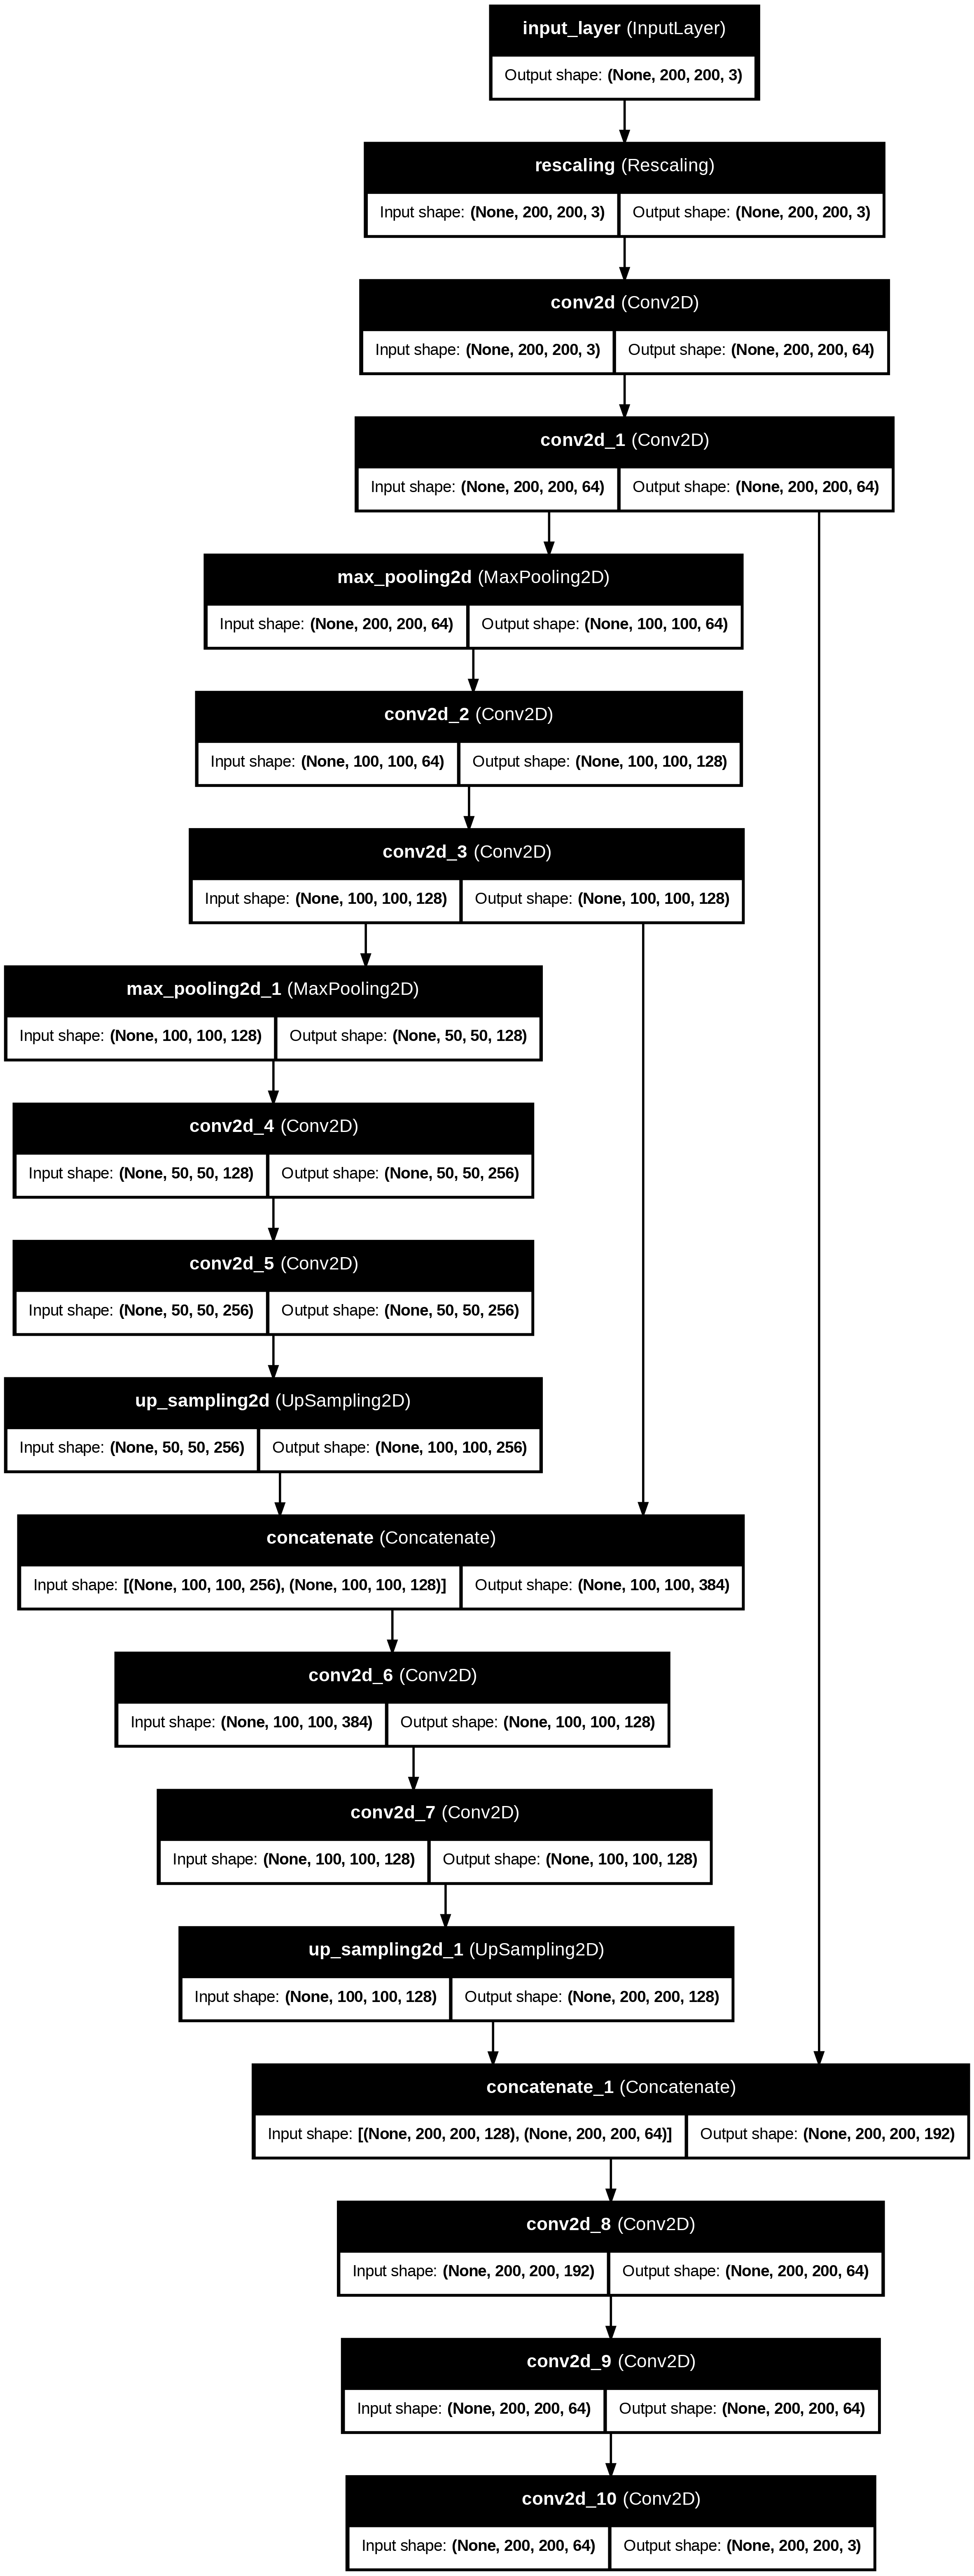

In [ ]:
import keras
from keras import layers

def get_model_unet_like(img_size, num_classes):
    inputs = keras.Input(shape=img_size + (3,))
    x = layers.Rescaling(1./255)(inputs)

    # ----- Encoder -----
    # Block 1
    x1 = layers.Conv2D(64, 3, activation="relu", padding="same")(x)
    x1 = layers.Conv2D(64, 3, activation="relu", padding="same")(x1)
    p1 = layers.MaxPooling2D(pool_size=2)(x1)

    # Block 2
    x2 = layers.Conv2D(128, 3, activation="relu", padding="same")(p1)
    x2 = layers.Conv2D(128, 3, activation="relu", padding="same")(x2)
    p2 = layers.MaxPooling2D(pool_size=2)(x2)

    # Block 3 (bottleneck)
    x3 = layers.Conv2D(256, 3, activation="relu", padding="same")(p2)
    x3 = layers.Conv2D(256, 3, activation="relu", padding="same")(x3)

    # ----- Decoder with skip connections -----
    # Up 1
    u2 = layers.UpSampling2D(size=2)(x3)
    u2 = layers.Concatenate()([u2, x2])  # skip connection
    u2 = layers.Conv2D(128, 3, activation="relu", padding="same")(u2)
    u2 = layers.Conv2D(128, 3, activation="relu", padding="same")(u2)

    # Up 2
    u1 = layers.UpSampling2D(size=2)(u2)
    u1 = layers.Concatenate()([u1, x1])  # skip connection
    u1 = layers.Conv2D(64, 3, activation="relu", padding="same")(u1)
    u1 = layers.Conv2D(64, 3, activation="relu", padding="same")(u1)

    # ----- Per-pixel classification -----
    outputs = layers.Conv2D(num_classes, 3, activation="softmax", padding="same")(u1)

    model = keras.Model(inputs, outputs, name="unet_like_segmentation")
    return model


model = get_model_unet_like(img_size=(200, 200), num_classes=3)
model.summary()

keras.utils.plot_model(model, to_file="segmentation_model.png", show_shapes=True, show_layer_names=True)
from IPython.display import Image, display
display(Image(filename="segmentation_model.png", width=300))
